In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
tands_mark = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_markplume/SalishSea_1h_20230301_20230305_grid_T.nc')
tands_mark

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 120)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-03-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20230301_20230305_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Sep-28 00:51:51 GMT
    uuid:         dd652558-c4b7-4d5b-84d8-31c46a9cd895

In [5]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
  
    
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'Tands {field}')
    
    plt.show()
    

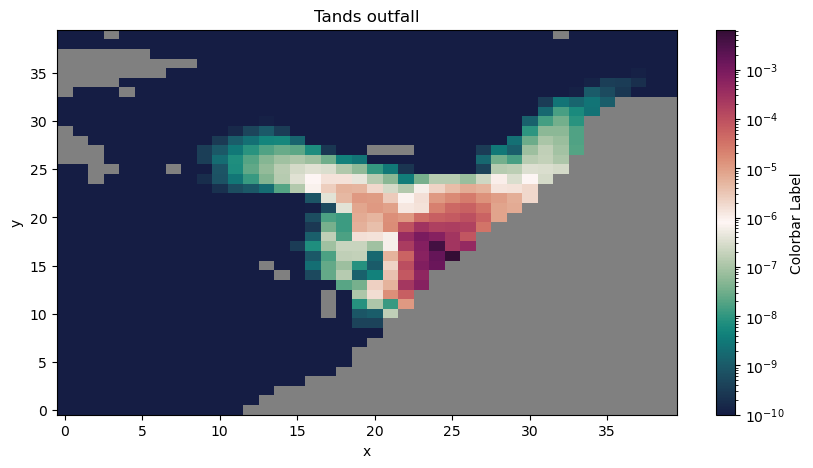

In [6]:
planview(tands_mark, 'outfall', 23, 25, cm_vel)

In [7]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, :29, dep, 250+iz:350-iz]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values

    axs.invert_yaxis()

    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'Tands {field}')
    
    plt.show()

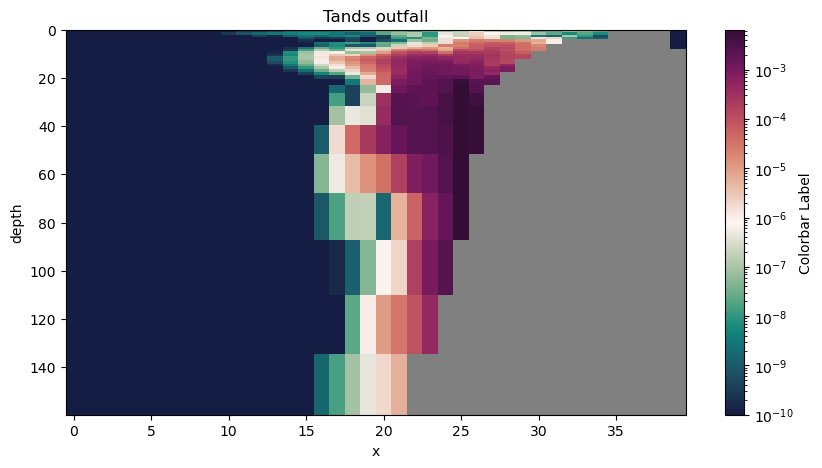

In [41]:
verticalview(tands_mark, 'outfall', 23, 446, cm_vel)

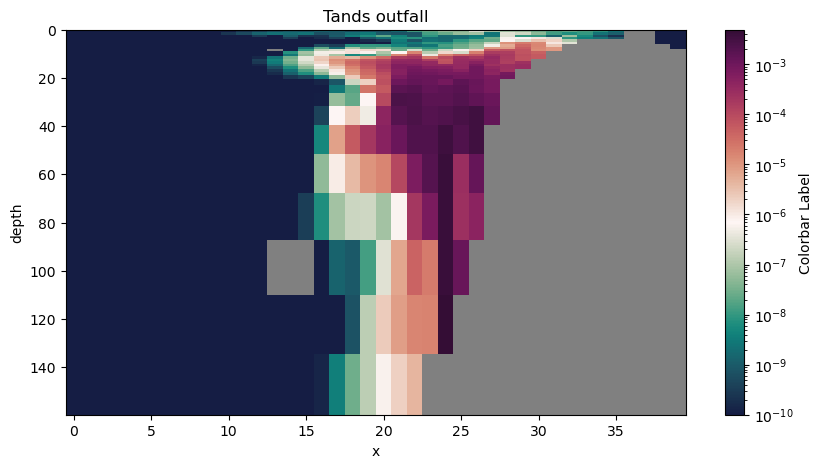

In [42]:
verticalview(tands_mark, 'outfall', 23, 447, cm_vel)

In [8]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    iz = 30  # width of domain plotted

    data = base[field][it, :29, 400+iz:500-iz, dep]

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values

    axs.invert_yaxis()
    
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'Tands {field}')
    
    plt.show()

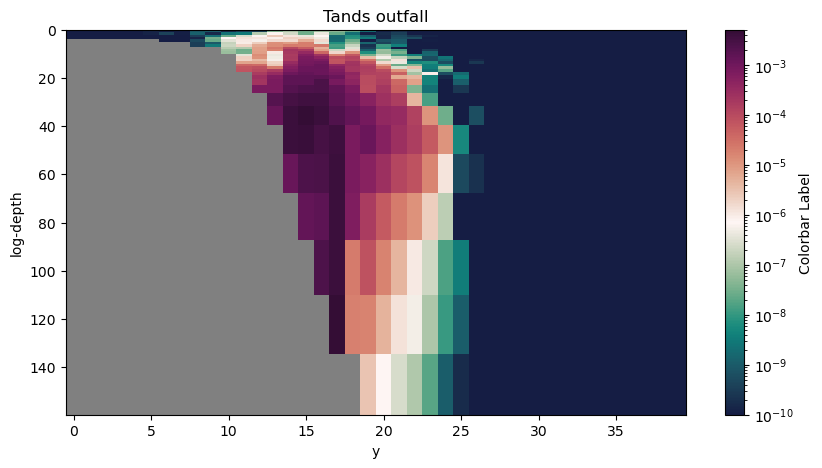

In [38]:
vertical_view_x(tands_mark, 'outfall', 23, 304,  cm_vel)

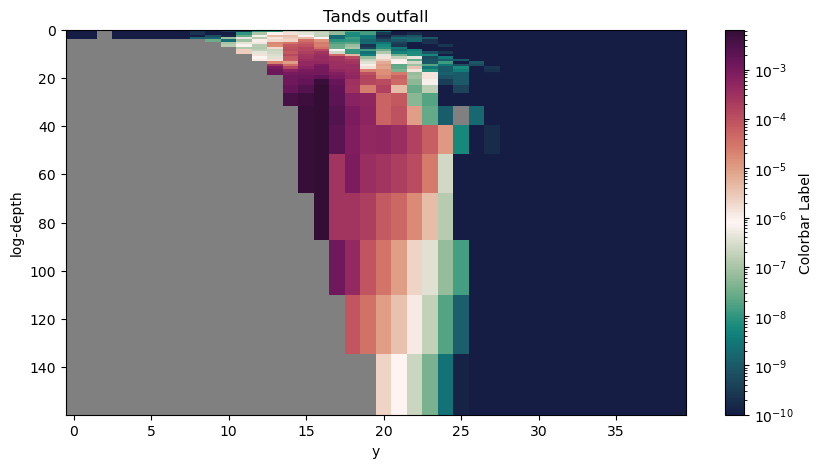

In [39]:
vertical_view_x(tands_mark, 'outfall', 23, 305,  cm_vel)

In [9]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
tands_slice = tands_mark.isel(deptht = slice(0, 29), y = y_slice, x = x_slice)

In [22]:
def plotTimeSeries(base, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    sum_data = base[field].sum(dim = ["y", "x"])

    offset = 1e-10
    
    norm_data = colors.LogNorm(vmin=sum_data.values.min() + offset, vmax=sum_data.values.max() + offset)

    sum_data.plot(ax =axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    
    axs.set_title(f'Tands {field}')
    
    plt.show()
    

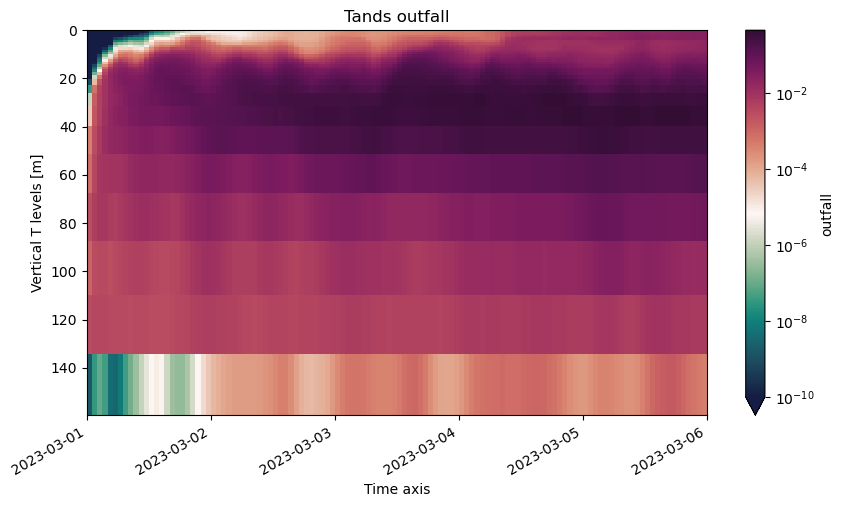

In [24]:
plotTimeSeries(tands_slice, 'outfall', cm_vel)